Analyse the subjects extracted in the file `get_subjects.py`.

We have tried different values for the `works_count` lower limit, to strike a balance between picking subjects of the upper levels, which are more general, and picking subjects that are popular. The problem is that different fields have different popularity. For example, medicine has more than 200 subjects in the third level with more than 25k works, whereas environmental science only has 31 across all levels. Therefore, we have started with a larger limit, iterated over all levels and all fields, and decreased the limit before iterating again. The iterations start at 25k works and go down to 50 subjects.

In [3]:
import json
from matplotlib import pyplot as plt

In [4]:
subjects = json.load(open('../data/openalex/subjects.json'))

In [5]:
len(subjects)  # no. of subjects

2157

In [6]:
level_counts = {}  # no. of subjects by level
for subject in subjects.values():
  if subject['level'] in level_counts:
    level_counts[subject['level']] += 1
  else:
    level_counts[subject['level']] = 1
level_counts

{0: 19, 1: 25, 2: 1999, 3: 108, 4: 6}

In [7]:
field_counts = {}  # no. of subject per field (excluding fields)
for subject in subjects.values():
  if subject['level'] == 0:
    field_counts[subject['name']] = 0
for subject in subjects.values():
  if subject['level'] != 0:
    for ancestor in subject['ancestors']:
      if ancestor['display_name'] in field_counts:
        field_counts[ancestor['display_name']] += 1
field_counts

{'Medicine': 325,
 'Chemistry': 267,
 'Biology': 491,
 'Computer science': 254,
 'Materials science': 214,
 'Engineering': 299,
 'Psychology': 260,
 'Physics': 345,
 'Political science': 326,
 'Mathematics': 241,
 'Business': 133,
 'Sociology': 153,
 'Geography': 244,
 'Art': 117,
 'Environmental science': 103,
 'Economics': 246,
 'Geology': 247,
 'History': 170,
 'Philosophy': 220}

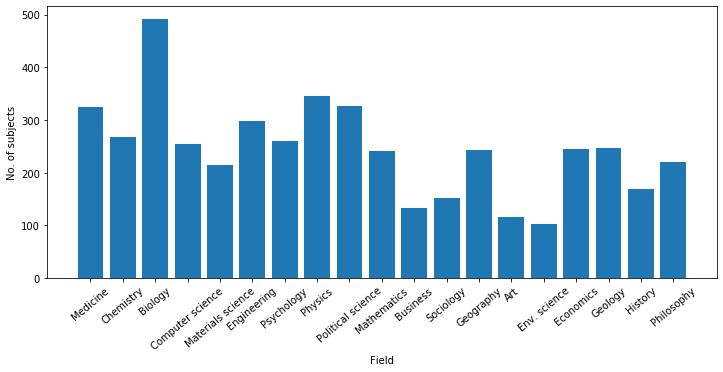

In [16]:
x = list(field_counts.keys())
x[x.index('Environmental science')] = 'Env. science'
plt.figure(figsize=(12, 5))
plt.bar(range(len(x)), field_counts.values())
plt.xticks(range(len(x)), x, rotation=40)
plt.xlabel('Field')
plt.ylabel('No. of subjects')
plt.show()

In [9]:
works_cnt = [s['works_count'] for s in subjects.values()]
sum(works_cnt)/len(works_cnt)  # avg. number of works it is tagged on

197179.61752433935

In [10]:
sum([cnt == 0 for cnt in works_cnt])  # no. of subjects that don't have works

0

In [11]:
for subject in subjects.values():
  if subject['works_count'] == 0:
    print(subject)

In [25]:
lower_levels = {3: {}, 4: {}}  # no. of subjects by level
for subject in subjects.values():
  if subject['level'] in lower_levels:
    for ancestor in subject['ancestors']:
      if ancestor['level'] == 0:
        if ancestor['display_name'] in lower_levels[subject['level']]:
          lower_levels[subject['level']][ancestor['display_name']] += 1
        else:
          lower_levels[subject['level']][ancestor['display_name']] = 1
lower_levels

{3: {'Business': 16,
  'Economics': 15,
  'Engineering': 16,
  'Political science': 26,
  'Mathematics': 10,
  'Psychology': 14,
  'Biology': 47,
  'Sociology': 16,
  'Computer science': 2,
  'Philosophy': 6,
  'Medicine': 2,
  'Geography': 36,
  'History': 34,
  'Physics': 5,
  'Chemistry': 5,
  'Art': 8,
  'Environmental science': 38,
  'Geology': 33,
  'Materials science': 1},
 4: {'Business': 1,
  'Economics': 1,
  'Engineering': 2,
  'Biology': 4,
  'Geography': 1,
  'History': 1,
  'Environmental science': 4,
  'Geology': 3}}